In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('heartdisease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.isnull().values.any()

False

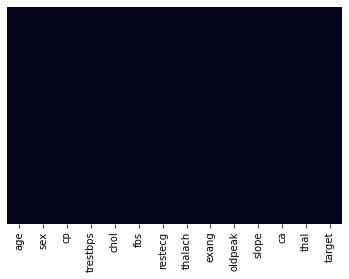

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Visualization

In [8]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

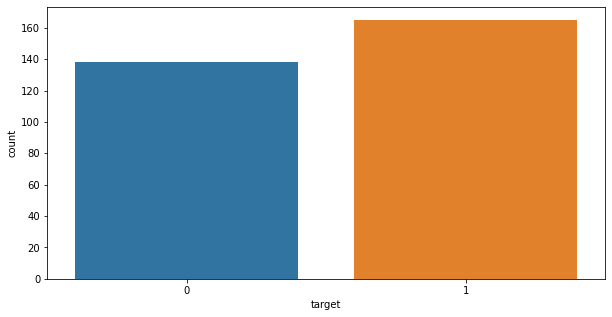

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(x='target',data=df)

In [10]:
NoDisease=len(df[df.target==0])
HaveDisease=len(df[df.target==1])
print ("Percentage of Patients Haven't Heart Disease:",NoDisease/len(df.target)*100,'%')
print ("Percentage of Patients Have Heart Disease:",HaveDisease/len(df.target)*100,'%')

Percentage of Patients Haven't Heart Disease: 45.54455445544555 %
Percentage of Patients Have Heart Disease: 54.45544554455446 %


Text(0.5, 0, 'Sex : 1 = Male , 0 = Female')

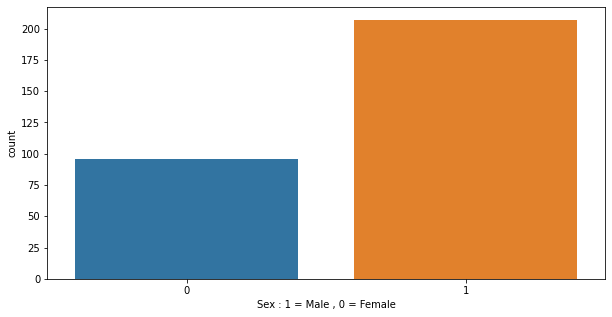

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x='sex',data=df)
plt.xlabel('Sex : 1 = Male , 0 = Female')

In [12]:
m=len(df[df.sex == 1])
f=len(df[df.sex==0])
print("Percentage of Male Patients : ", m/len(df['sex'])*100,'%')
print('Percentage of Female Patients : ',f/len(df['sex'])*100,'%')


Percentage of Male Patients :  68.31683168316832 %
Percentage of Female Patients :  31.683168316831683 %


In [13]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


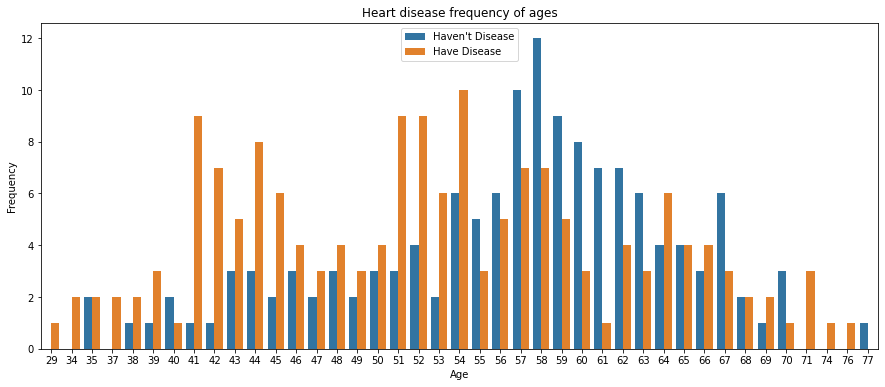

In [14]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',hue='target',data=df)
plt.title('Heart disease frequency of ages')
plt.xlabel('Age')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()


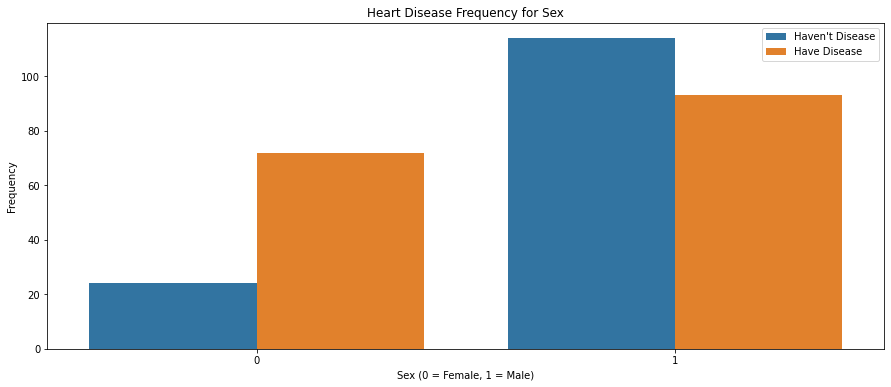

In [15]:
plt.figure(figsize=(15,6))
sns.countplot(x='sex',hue='target',data=df)
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

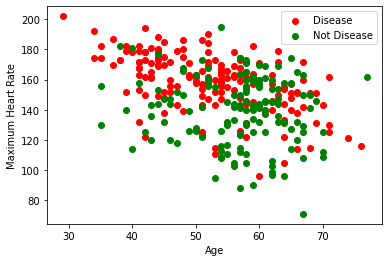

In [16]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c='red')
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)],c='green')
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()


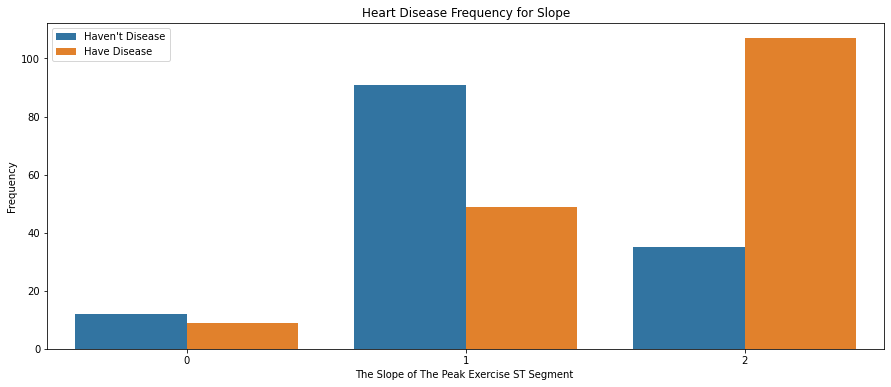

In [17]:
plt.figure(figsize=(15,6))
sns.countplot(x='slope',hue='target',data=df)
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

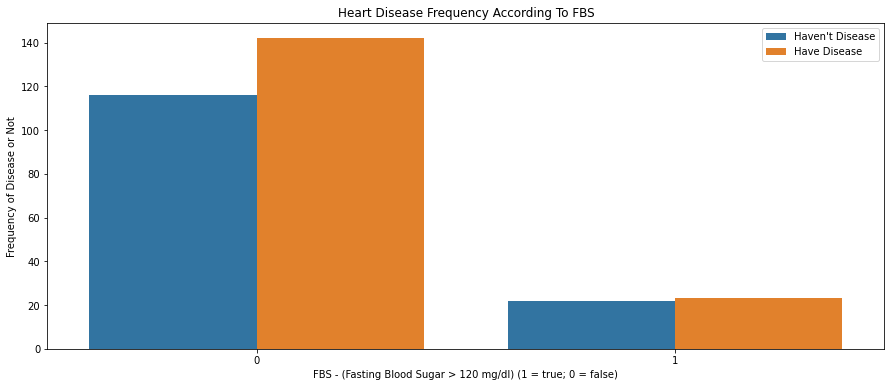

In [18]:
plt.figure(figsize=(15,6))
sns.countplot(x='fbs',hue='target',data=df)
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

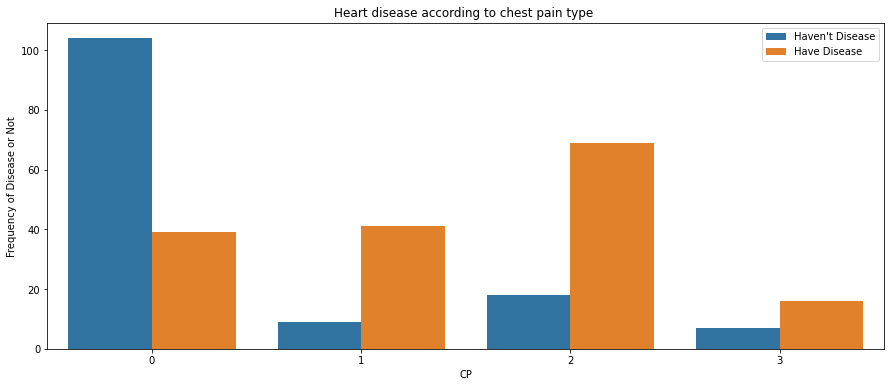

In [19]:
plt.figure(figsize=(15,6))
sns.countplot(x='cp',hue='target',data=df)
plt.title('Heart disease according to chest pain type ')
plt.xlabel('CP')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [20]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# checking Skewness

In [21]:
df.skew()

age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     1.269720
slope      -0.508316
ca          1.310422
thal       -0.476722
target     -0.179821
dtype: float64

In [22]:
for col in df.skew().index:
    if col in df.describe().columns:
        if df[col].skew()>0.55:
            df[col]=np.sqrt(df[col])
        if df[col].skew()<-0.55 :
            df[col]=np.cbrt(df[col])

In [23]:
df.skew()

age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.493246
chol        0.561800
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     0.160467
slope      -0.508316
ca          0.615547
thal       -0.476722
target     -0.179821
dtype: float64

# Changing Categorical variables into Numericle Variables

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=le.fit_transform(df[column])
    

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,1.0,3,12.041595,15.264338,1.0,0,49,0.0,1.516575,0,0.0,1,1
1,3,1.0,2,11.401754,15.811388,0.0,1,84,0.0,1.870829,0,0.0,2,1
2,7,0.0,1,11.401754,14.282857,0.0,0,71,0.0,1.183216,2,0.0,2,1
3,22,1.0,1,10.954451,15.362291,0.0,1,76,0.0,0.894427,2,0.0,2,1
4,23,0.0,0,10.954451,18.814888,0.0,1,62,1.0,0.774597,2,0.0,2,1


# Find and remove Outliers

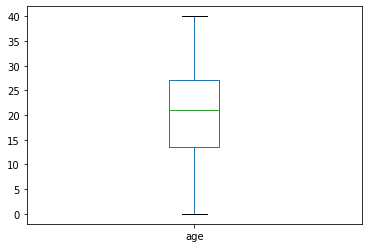

In [26]:
df['age'].plot.box()

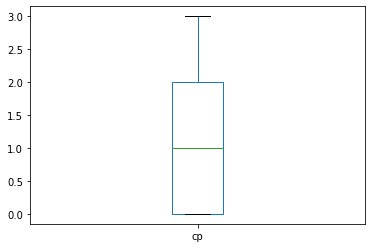

In [27]:
df['cp'].plot.box()

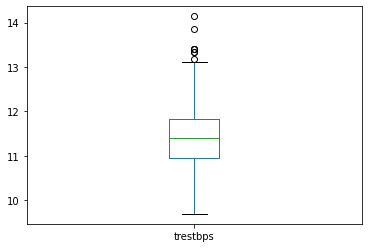

In [28]:
df['trestbps'].plot.box()

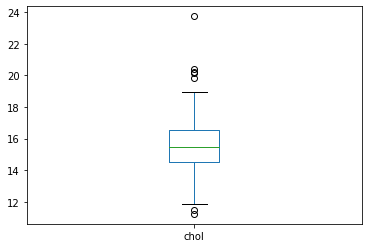

In [29]:
df['chol'].plot.box()

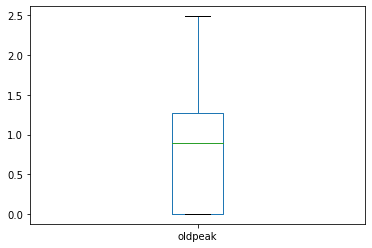

In [30]:
df['oldpeak'].plot.box()

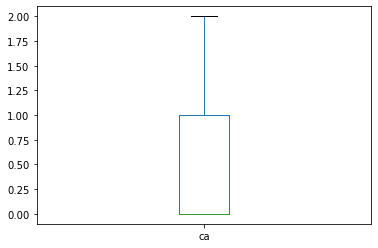

In [31]:
df['ca'].plot.box()

In [32]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.96637893, 0.68100522, 1.97312292, ..., 0.81416646, 2.14887271,
        0.91452919],
       [1.94718143, 0.68100522, 1.00257707, ..., 0.81416646, 0.51292188,
        0.91452919],
       [1.49894138, 1.46841752, 0.03203122, ..., 0.81416646, 0.51292188,
        0.91452919],
       ...,
       [1.526679  , 0.68100522, 0.93851463, ..., 1.32118288, 1.12302895,
        1.09345881],
       [0.29401885, 0.68100522, 0.93851463, ..., 0.69575354, 1.12302895,
        1.09345881],
       [0.29401885, 1.46841752, 0.03203122, ..., 0.69575354, 0.51292188,
        1.09345881]])

In [33]:
thresold=3
print(np.where(z>3))

(array([ 48,  85, 223, 248, 281], dtype=int64), array([12,  4,  3,  3, 12], dtype=int64))


In [34]:
new=df[(z<3).all(axis=1)]

In [35]:
print(df.shape,'\t',new.shape)

(303, 14) 	 (298, 14)


In [36]:
df=new
df.shape

(298, 14)

# Model Training

In [37]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,1.0,3,12.041595,15.264338,1.0,0,49,0.0,1.516575,0,0.0,1,1
1,3,1.0,2,11.401754,15.811388,0.0,1,84,0.0,1.870829,0,0.0,2,1
2,7,0.0,1,11.401754,14.282857,0.0,0,71,0.0,1.183216,2,0.0,2,1
3,22,1.0,1,10.954451,15.362291,0.0,1,76,0.0,0.894427,2,0.0,2,1
4,23,0.0,0,10.954451,18.814888,0.0,1,62,1.0,0.774597,2,0.0,2,1


In [38]:
X=df.drop(columns='target',axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,29,1.0,3,12.041595,15.264338,1.0,0,49,0.0,1.516575,0,0.000000,1
1,3,1.0,2,11.401754,15.811388,0.0,1,84,0.0,1.870829,0,0.000000,2
2,7,0.0,1,11.401754,14.282857,0.0,0,71,0.0,1.183216,2,0.000000,2
3,22,1.0,1,10.954451,15.362291,0.0,1,76,0.0,0.894427,2,0.000000,2
4,23,0.0,0,10.954451,18.814888,0.0,1,62,1.0,0.774597,2,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,23,0.0,0,11.832160,15.524175,0.0,1,23,1.0,0.447214,1,0.000000,3
299,11,1.0,3,10.488088,16.248077,0.0,1,32,0.0,1.095445,1,0.000000,3
300,34,1.0,0,12.000000,13.892444,1.0,1,40,0.0,1.843909,1,1.414214,3
301,23,1.0,0,11.401754,11.445523,0.0,1,16,1.0,1.095445,1,1.000000,3


In [1]:
y=df['target']
y

NameError: name 'df' is not defined

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
print(X_train.shape,'\t',X_test.shape)

(238, 13) 	 (60, 13)


In [42]:
#Importiong all model library
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#importing error metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score


In [43]:
model = [LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier()]
for m in model:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    predm=m.predict(X_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score of LogisticRegression() is:
0.8166666666666667
[[17  6]
 [ 5 32]]
              precision    recall  f1-score   support

           0       0.77      0.74      0.76        23
           1       0.84      0.86      0.85        37

    accuracy                           0.82        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.82      0.82      0.82        60

Accuracy score of GaussianNB() is:
0.85
[[18  5]
 [ 4 33]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        23
           1       0.87      0.89      0.88        37

    accuracy                           0.85        60
   macro avg       0.84      0.84      0.84        60
weighted avg       0.85      0.85      0.85        60

Accuracy score of SVC() is:
0.7666666666666667
[[15  8]
 [ 6 31]]
              precision    recall  f1-score   support

           0       0.71      0.65      0.68        23
           1       0.79      0.

In [44]:
#cross validate the model
model = [LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier()]
for m in model:
    score=cross_val_score(m,X,y,cv=10,scoring='accuracy')
    print('Model : ',m)
    print('Score :',score)
    print('Mean Score :',score.mean())
    print('Standard deviation:',score.std())
    print('*****************************************************************************************************************')
    print('\t\t')

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Model :  LogisticRegression()
Score : [0.9        0.8        0.8        0.96666667 0.83333333 0.86666667
 0.83333333 0.93333333 0.72413793 0.82758621]
Mean Score : 0.8485057471264369
Standard deviation: 0.06723853024713745
*****************************************************************************************************************
		
Model :  GaussianNB()
Score : [0.83333333 0.8        0.83333333 0.93333333 0.83333333 0.86666667
 0.86666667 0.83333333 0.75862069 0.82758621]
Mean Score : 0.8386206896551724
Standard deviation: 0.043207384267336314
*****************************************************************************************************************
		
Model :  SVC()
Score : [0.7        0.66666667 0.7        0.76666667 0.83333333 0.6
 0.7        0.8        0.62068966 0.72413793]
Mean Score : 0.7111494252873565
Standard deviation: 0.06997357144111341
*****************************************************************************************************************
		
Model :  

# Boosting Models:

In [45]:
#cross validate the model
model = [LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier()]
for m in model:
    score=cross_val_score(m,X,y,cv=10,scoring='accuracy')
    print('Model : ',m)
    print('Score :',score)
    print('Mean Score :',score.mean())
    print('Standard deviation:',score.std())
    print('*****************************************************************************************************************')
    print('\t\t')

In [46]:
model=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]
for m in model:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    predm=m.predict(X_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))

Accuracy score of RandomForestClassifier() is:
0.75
[[16  7]
 [ 8 29]]
              precision    recall  f1-score   support

           0       0.67      0.70      0.68        23
           1       0.81      0.78      0.79        37

    accuracy                           0.75        60
   macro avg       0.74      0.74      0.74        60
weighted avg       0.75      0.75      0.75        60

Accuracy score of AdaBoostClassifier() is:
0.7333333333333333
[[15  8]
 [ 8 29]]
              precision    recall  f1-score   support

           0       0.65      0.65      0.65        23
           1       0.78      0.78      0.78        37

    accuracy                           0.73        60
   macro avg       0.72      0.72      0.72        60
weighted avg       0.73      0.73      0.73        60

Accuracy score of GradientBoostingClassifier() is:
0.7333333333333333
[[17  6]
 [10 27]]
              precision    recall  f1-score   support

           0       0.63      0.74      0.68       

In [47]:
#Cross Validate boosting models
model=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]
for m in model:
    score=cross_val_score(m,X,y,cv=10,scoring='accuracy')
    print('Model : ',m)
    print('Score :',score)
    print('Mean Score :',score.mean())
    print('Standard deviation:',score.std())
    print('*****************************************************************************************************************')
    print('\t\t')

Model :  RandomForestClassifier()
Score : [0.86666667 0.83333333 0.83333333 0.93333333 0.86666667 0.8
 0.8        0.9        0.75862069 0.75862069]
Mean Score : 0.8350574712643679
Standard deviation: 0.054793357830667994
*****************************************************************************************************************
		
Model :  AdaBoostClassifier()
Score : [0.86666667 0.8        0.8        0.93333333 0.9        0.73333333
 0.7        0.8        0.72413793 0.72413793]
Mean Score : 0.7981609195402299
Standard deviation: 0.07625152556686941
*****************************************************************************************************************
		
Model :  GradientBoostingClassifier()
Score : [0.83333333 0.8        0.86666667 0.93333333 0.9        0.6
 0.73333333 0.83333333 0.72413793 0.75862069]
Mean Score : 0.7982758620689656
Standard deviation: 0.09291203539110476
**************************************************************************************************

In [48]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)
gnb.score(X_train,y_train)
pregnb=gnb.predict(X_test)
print(accuracy_score(y_test,pregnb))
print(confusion_matrix(y_test,pregnb))
print(classification_report(y_test,pregnb))

0.85
[[18  5]
 [ 4 33]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        23
           1       0.87      0.89      0.88        37

    accuracy                           0.85        60
   macro avg       0.84      0.84      0.84        60
weighted avg       0.85      0.85      0.85        60



In [49]:
score=cross_val_score(gnb,X,y,cv=10,scoring='accuracy')
print('Score :',score)
print('Mean Score :',score.mean())
print('Standard deviation:',score.std())

Score : [0.83333333 0.8        0.83333333 0.93333333 0.83333333 0.86666667
 0.86666667 0.83333333 0.75862069 0.82758621]
Mean Score : 0.8386206896551724
Standard deviation: 0.043207384267336314


In [50]:
etc=ExtraTreesClassifier(n_estimators=100,random_state=0)
etc.fit(X_train,y_train)
etc.score(X_train,y_train)
preetc=etc.predict(X_test)
print(accuracy_score(y_test,preetc))
print(confusion_matrix(y_test,preetc))
print(classification_report(y_test,preetc))

0.8166666666666667
[[19  4]
 [ 7 30]]
              precision    recall  f1-score   support

           0       0.73      0.83      0.78        23
           1       0.88      0.81      0.85        37

    accuracy                           0.82        60
   macro avg       0.81      0.82      0.81        60
weighted avg       0.82      0.82      0.82        60



In [51]:
score=cross_val_score(etc,X,y,cv=10,scoring='accuracy')
print('Score :',score)
print('Mean Score :',score.mean())
print('Standard deviation:',score.std())

Score : [0.9        0.76666667 0.83333333 0.83333333 0.8        0.8
 0.76666667 0.86666667 0.75862069 0.86206897]
Mean Score : 0.8187356321839081
Standard deviation: 0.04576401813715228


# Among this model GaussianNB predict highest score so we select GaussianNB as our final model 

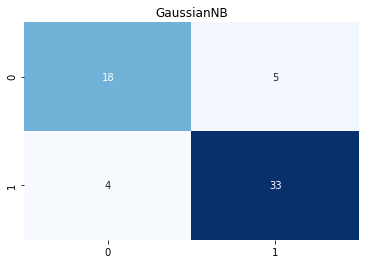

In [52]:
cm=confusion_matrix(y_test,pregnb)
sns.heatmap(cm,annot=True,cbar=False,cmap='Blues')
plt.title('GaussianNB')
plt.show()

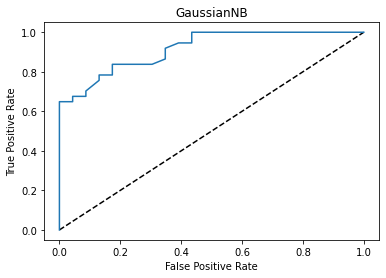

0.837250293772033


In [53]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=etc.predict_proba(X_test)[:,1]
fpr,tpr,thredholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GaussianNB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GaussianNB')
plt.show()

auc_score=roc_auc_score(y_test,pregnb)
print(auc_score)